# Notebook activity A2.7  Testing for cointegration and estimating error correction models

In this notebook activity, we will be using R to test for cointegration and to estimate an error correction model (ECM). For this we will be using the PPP dataset. As a reminder the variables in this dataset are

* `year`: the year, starting at 1973 and ending at 2008
* `quarter`: the quarter of the year, taking values 1, 2, 3 and 4
* `exchangeRate`: the index of the exchange rate between the US dollar and Japanese Yen (1973 Q1 = 100)
* `japanPrices`: the index of the general price level in Japan (1973 Q1 = 100)
* `usPrices`: the index of the general price level in the USA (1973 Q1 = 100).

The data for the PPP dataset is stored in the `ppp` data frame.

## (a) Getting started

### (i)

Start by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the ppp data frame
data(ppp)
# Check the data frame has loaded OK
head(ppp)
tail(ppp)

## (b) Exploring the data

### (i)

Using the emply code cell below, obtain summary statistics for the  data in the three time series `exchangeRate`, `japanPrices` and `usPrices`.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [2]:
summary(ppp$exchangeRate)
summary(ppp$japanPrices)
summary(ppp$usPrices)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.92   41.47   47.41   59.99   82.69  107.59 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  100.0   156.9   166.9   165.3   175.1   188.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  100.0   233.3   273.2   261.6   302.4   461.7 

###  <a class="tocSkip">

In Subsection 6.2.2 the following variables were defined:

* $\texttt{usp}_t$: the log of the price level (in US dollars) in the USA at time $t$
* $\texttt{jpp}_t$: the log of the price level (in US dollars) in Japan at time $t$

and noted that $\texttt{jpp}_t = \log(\texttt{exchangeRate})_t + \log(\texttt{japanPrices})_t$.

### (ii)

Using the code cell generate the variables `usp` and `jpp` and convert them into time series objects called `uspTS` and `jppTS` respectively. 

#### Solution <a class="tocSkip">

The required code is as follows. Note that these instructions will not generate any output.

In [3]:
# Create usp and jpp
usp <- log(ppp$usPrices)
jpp <- log(ppp$exchangeRate) + log(ppp$japanPrices)

# Convert usp and jpp to being time series.
uspTS <- ts(usp,  start = c(1973, 1), frequency = 4)
jppTS <- ts(jpp,  start = c(1973, 1), frequency = 4)

### (iii)

Construct a joint time plot of `jppTS` and `uspTS` by running the following code. Based on this plot, is it possible that the two variables are cointegrated? Why or why not?

In [ ]:
# plot jppTS first, set the y-scale to make room for uspTS
plot(jppTS, ylim = range(jppTS, uspTS), 
     ylab = "Price level (in logs)", xlab = "Year")
# Add uspTS to the plot
lines(uspTS, col = 2, lty = 2)
# add a legend
legend("topright", c("jppTS", "uspTS"), lty = 1:2, col = 1:2)

#### Solution <a class="tocSkip">

It looks like there might be a downward trend in `jppTS` and an upward trend in `uspTS`. So it is possible that the two series are cointegrated. 

### (iv)

Using the code cell below  obtain correlograms for `jppTS` and `uspTS`, and also correlograms for the first differences of `jppTS` and `uspTS`.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

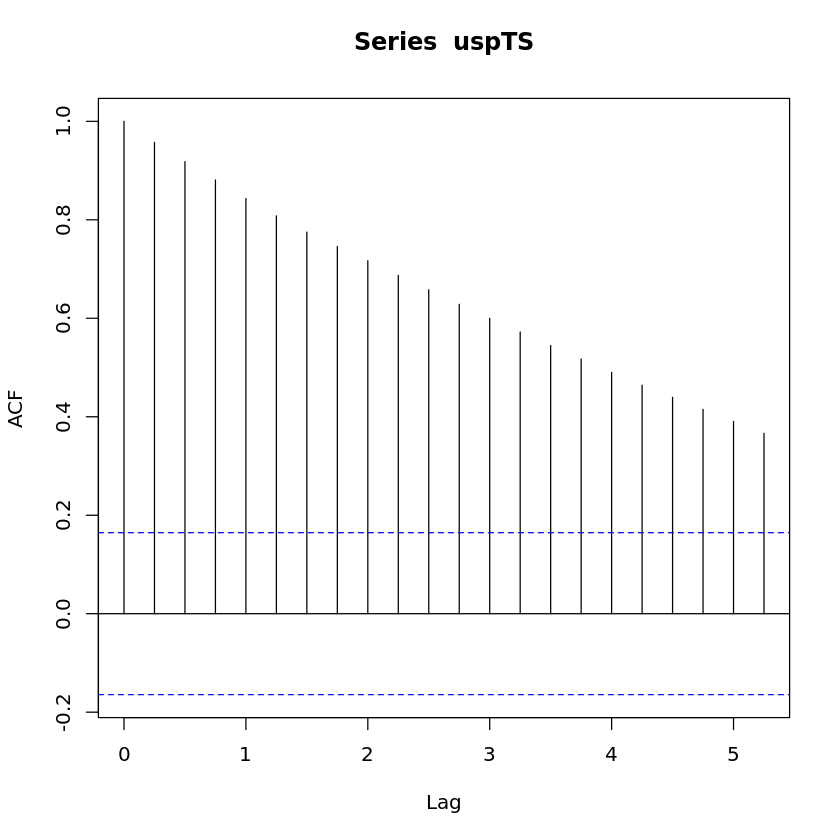

In [5]:
acf(jppTS)
acf(uspTS)
acf(diff(jppTS))
acf(diff(uspTS))

### (v)

Using the plots you created in part (iv) why is it possible that both `jppTS` and `uspTS` could be difference stationary?

#### Solution <a class="tocSkip">

In the correlograms for `jppTS` and `uspTS`, the autocorrelations only decline slowly as the number of lags increases. In contrast the autocorrelations much faster for the first differences. 

So both series show high persistence, but their first differences do not. This could suggest that the series are difference stationary or I(1).

## (c) Testing for unit roots

As you saw in part (b) both `jppTS` and `uspTS` could be difference stationary, that is, both could have a unit root. In this part we will investigate this further using ADF tests.

Considering `jppTS` first. The time plot in part (b)(i) suggests that this time series could be a random walk with drift. The time series represents quarterly data, so a reasonable starting choice for the number of lags is 4. However rather than fixing on a particular number of lags as we did in Notebook activity A2.5, we will allow the number of lags to be chosen by AIC.  

### (i)

Perform the ADF test on `jppTS` by running the following code. You may remember that an additional package called `urca` is necessary and the code below loads it to this session. What should we conclude from this test?

In [ ]:
# Load the usca package (which contains ur.df())
library(urca)

# Provide a summary of the results from the ADF test
summary(ur.df(jppTS, type = "drift",  selectlags = "AIC"))

#### Solution <a class="tocSkip">

The test statistic is $-1.116$; and comparing this again  to the critical values in the `tau2` row, we cannot reject the null hypothesis that `jppTS`  contains a unit root, i.e. is difference stationary.

---

###  <a class="tocSkip">

In Subsection 5.2 it was noted that because ADF tests have low power, if the test suggests that a time series variable has a unit root, then often the test is also done on the first difference of the variable, which should be I(0).

So in part (ii) you will carry out the ADF test on the first difference of `jppTS`. For this test we will assume that a simple random walk model is appropriate.

### (ii)

Perform the ADF test on the first difference `jppTS` by running the following code. What should we conclude from this test?

In [ ]:
summary(ur.df(diff(jppTS), type = "none",  selectlags = "AIC"))

#### Solution <a class="tocSkip">

The test statistic is $-7.145$ and comparing this with critical values for `𝚝𝚊𝚞𝟸`, we can reject the null hypothesis that the first differences of `jppTS` has a unit root. So, we conclude that the first difference of `jppTS` is stationary. This ADF test, and the ADF test done in part (i) suggest that `𝚓𝚙𝚙TS` is  $I(1)$.

---

Next you will consider the stationarity of `uspTS` and of its first difference. In what follows assume that a random walk with drift is appropriate for `uspTS` and that a simple random walk is appropriate for its first difference.

### (iii)

Using the code cell below obtain summaries of the ADF test applied to `uspTS` and to its first difference. (In both cases allow the number of lags to be chosen using AIC.)

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [8]:
summary(ur.df(uspTS, type = "drift",  selectlags = "AIC"))
summary(ur.df(diff(uspTS), type = "none",  selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.039081 -0.007438 -0.000284  0.006767  0.048701 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.044789   0.022040   2.032   0.0441 *  
z.lag.1     -0.007109   0.003931  -1.809   0.0727 .  
z.diff.lag   0.481999   0.078780   6.118 9.33e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01357 on 137 degrees of freedom
Multiple R-squared:  0.2892,	Adjusted R-squared:  0.2788 
F-statistic: 27.87 on 2 and 137 DF,  p-value: 7.015e-11


Value of test-statistic is: -1.8085 8.2047 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.039723 -0.003543  0.002841  0.010434  0.050364 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.24820    0.07025  -3.533  0.00056 ***
z.diff.lag -0.23382    0.08464  -2.763  0.00652 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01396 on 137 degrees of freedom
Multiple R-squared:  0.1959,	Adjusted R-squared:  0.1842 
F-statistic: 16.69 on 2 and 137 DF,  p-value: 3.258e-07


Value of test-statistic is: -3.5332 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


### (iv)

Based on the results you obtained in part (iii), is it reasonable to assume that `uspTS` is $I(1)$?

#### Solution <a class="tocSkip">

For `uspTS` the ADF test statistic is $-1.8085$, which after referring to the critical values for  𝚝𝚊𝚞𝟸, means we should not reject the null hypothesis that `uspTS`  contains a unit root, i.e. is non-stationary.
  
For the first difference of `uspTS` the test statistic is $-3.5332$; which after referring to the critical values for  𝚝𝚊𝚞𝟸, means we should reject the null hypothesis that this first difference contains a unit root. Instead there is evidence that this
 series is stationary. 
 
The two tests done together suggest that `uspTS` is $I(1)$.

## (e) Testing for cointegration

Given that both `jppTS` and `uspTS` are $I(1)$, the last step before choosing a model which represents their relationship is to find out if they are cointegrated. Let's consider the cointegrating regression

$\texttt{jppTS}_t = \beta_0 + \beta_1\ \texttt{uspTS}_t + \texttt{u}_t$.

### (i)

Estimate this cointegrating regression, saving results in a object called `coint`, and obtain a summary of the output.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [9]:
coint <- lm(jppTS ~ uspTS)
summary(coint)


Call:
lm(formula = jppTS ~ uspTS)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64547 -0.16206 -0.04490  0.09473  0.60293 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.54085    0.37284   36.32   <2e-16 ***
uspTS       -0.80020    0.06744  -11.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2601 on 140 degrees of freedom
Multiple R-squared:  0.5014,	Adjusted R-squared:  0.4978 
F-statistic: 140.8 on 1 and 140 DF,  p-value: < 2.2e-16


###  <a class="tocSkip">

To consider whether `jppTS` and `uspTS` are indeed cointegrated we will consider the residuals from the regression model you fitted in part (e)(i). If there is cointegration these residuals should be stationary.

We can extract these residuals from the object created when fitting the regression model by using the command `residuals()`. We will apply the `ts()` function to these residuals so that they are treated as a time series object.

### (ii) 

Obtain the residuals for the regression you fitted in part (e)(i), and visually explore them, by running the code below. 

In [ ]:
uHat <- ts(residuals(coint), start = c(1973, 1), frequency = 4)
plot(uHat)
acf(uHat)

### (iii)

Based on the plots you obtained in part (e)(ii), is it plausible that the residuals are stationary?

#### Solution <a class="tocSkip">

The residuals *could* be stationary, they seem to exhibit a slight trend though, and its not clear that the variance is constant. The acf shows that correlations do die out after year 3, so persistence is not too high. So this is a messy example of what *may* be a stationary series, but a formal ADF test is required.

### (iv)

Using the code cell below, perform an ADF test on the residuals to check for stationarity. Use the random walk without drift specification and allow the number of lags to be chosen using AIC.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [11]:
summary(ur.df(uHat, type = "none",  selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.178804 -0.026529  0.001459  0.040032  0.158120 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.05190    0.01820  -2.852  0.00501 ** 
z.diff.lag  0.39070    0.07674   5.091 1.14e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0547 on 138 degrees of freedom
Multiple R-squared:  0.195,	Adjusted R-squared:  0.1833 
F-statistic: 16.71 on 2 and 138 DF,  p-value: 3.169e-07


Value of test-statistic is: -2.8519 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


### (v)

Based on your results in part (iv), are the residuals stationary? Hence are `jppTS` and `uspTS` cointegrated?

#### Solution <a class="tocSkip">

The test statistic is $-2.852$, compared to a critical value of $-2.58$ at the 1\% level of significance so we can reject the null hypothesis of a unit root and conclude that the residuals are stationary, so `jppTS` and `usp_ts` are cointegrated. This example is not fully clear cut. Had we chosen a random walk with drift (and the time plot may suggest a faint one), this conclusion would have been reached only for a 10\% significance level (-2.858 against a critical value of -3.46 at the 1\% significance level, -2.88 at 5\% significance level, and -2.57 at 10\% significance level).

---

## (f) Fitting an error correction model (ECM)

Recall from Box 23 in Subsection 6.3 when two series $Y_t$ and $X_t$ are linked by the cointegrating regression

$ Y_t = \beta_0 + \beta_1 X_t + u_t$,

there is a corresponding error correction model:

$ \Delta Y_t = \alpha_0 + \alpha_1 \Delta X_t + \alpha_2 \widehat{u}_{t-1} + \varepsilon_t$

where $\widehat{u}_{t-1}$ are the lag of order 1 of the residuals from the cointegrating regression. 

So having established in part (e) that `jppTS` and `uspTS` are cointegrated, and having obtained the residuals $\widehat{u}_t$ from that regression we are in a position to fit a error correction mode (ECM) to these time series

### (i)

In an ECM for `jppTS` and `uspTS`, what is the dependent variable and which are the regressors?

#### Solution <a class="tocSkip">

The dependent variable is `diff(jppTS)`. The regressors are `diff(uspTS)` and `lag(uHat)`. 

### (ii)

Use the code below to calculate the following variables:
* `diffJPP` - the first difference of `jppTS`
* `diffUSP` - the first difference of `uspTS`
* `lagUHat` - the values of `uHat` lagged by 1

Create a data frame called `pppCointData` that contains `jppTS`, `diffJPP`,  `uspTS`, `diffUSP`,  `uHat`  and `lagUhat`.

By considering the first few observations in `pppCoint`, check that the transformation appears to have been done correctly.

In [ ]:
diffJPP <- c(NA,diff(jppTS))
diffUSP <- c(NA, diff(uspTS))
lagUHat <- uHat - c(NA, diff(uHat))

pppCointData <- data.frame(jpp = jppTS, diffJPP = diffJPP, 
                           usp = uspTS, diffUSP = diffUSP, 
                           uHat = uHat, lagUHat = lagUHat)
head(pppCointData)

#### Solution <a class="tocSkip">

To check if the new variables are as expected, consider the values in the second row of the table.

The value of `diffJPP` is $-0.02900196$. This is the same (to six decimal places) as the difference of the first two values of `jppTS`: $9.181338 - 9.210340 = -0.029002$ as we expect for the first difference.

The value of `diffUSP` is $0.04736057$. This is the same (to six decimal places) as the difference of the first two values of `jppTS`: $4.652531 - 4.605170 = 0.047361$. Again this is what we expect for the first difference.

The value of `lagUHat` is $-0.6454710$ which is the same as the first value for `uHat` as we expect for the first lag.

### (iii)

Using the code cell below, estimate the ECM model and obtain a summary of the results.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [13]:
jppECM <- lm(diffJPP ~ diffUSP + lagUHat, data = pppCointData)
summary(jppECM)


Call:
lm(formula = diffJPP ~ diffUSP + lagUHat, data = pppCointData)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.149163 -0.036077  0.006804  0.035383  0.133699 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.010141   0.005582  -1.817   0.0714 .
diffUSP      0.639585   0.290613   2.201   0.0294 *
lagUHat     -0.030812   0.018137  -1.699   0.0916 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05472 on 138 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.06459,	Adjusted R-squared:  0.05104 
F-statistic: 4.765 on 2 and 138 DF,  p-value: 0.009977


### (iv)

Based on the results you obtained in part (iii), comment on the error correction term in this model.

#### Solution <a class="tocSkip">

The error correction term is the coefficient of the lagged residuals from the cointegrating regression; here the coefficient has a negative value as expected ($-0.0308$), although it is small suggesting a very low speed of adjustment. This coefficient is only statistically significant at 10\% significance level. Notice also the very low $R^2$ for this model.